In [1]:
import warnings
warnings.filterwarnings('ignore')

from matplotlib.pyplot import plot, show, figure, title
import matplotlib as plt
%matplotlib inline

import numpy as np

from scipy.fftpack import dct, idct
from scipy.sparse import coo_matrix

In [2]:
Fs = 40e3  #Sample rate
duration = 1./8
N_samps = np.floor(duration*Fs)
M = 250   # Number of compressed "basis" functions - we're going from N_samps to M samps.
f1 = 200
f2 = 3950

print("Compression ratio {0}".format(M/N_samps))
t = np.linspace(0,duration,N_samps)

Compression ratio 0.05


Text(0, 0.5, 'X(t)')

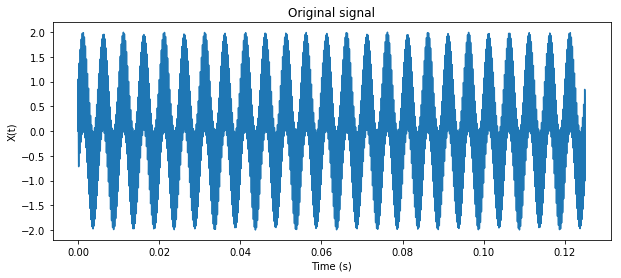

In [3]:
X = np.sin(2*np.pi*f1*t) + np.sin(2*np.pi*f2*t)

figure(figsize=[10,4])
plot(t,X)
title('Original signal')
plt.pyplot.xlabel('Time (s)')
plt.pyplot.ylabel('X(t)')

In [4]:
yi = np.random.randint(0,N_samps,(M,))
yi = np.sort(yi)
Y = X[yi]

Text(0, 0.5, 'X(t) and X(random sample)')

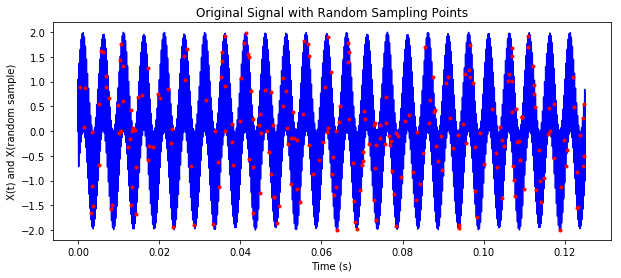

In [5]:

figure(figsize=[10,4])
plot(t,X,'b',t[yi],Y,'r.')
title('Original Signal with Random Sampling Points')
plt.pyplot.xlabel('Time (s)')
plt.pyplot.ylabel('X(t) and X(random sample)')

In [6]:
D = dct(np.eye(N_samps.astype(int)))
A = D[yi]  

np.shape(A)

(250, 5000)

In [7]:
from sklearn.linear_model import Lasso 

Solution is %95.82000000000001 sparse


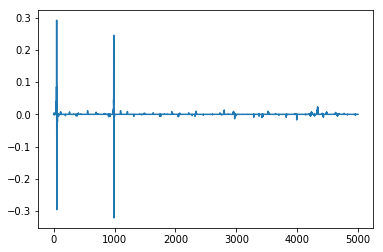

In [8]:

lasso = Lasso(alpha=0.01)
lasso.fit(A,Y)

plot(lasso.coef_)

sparseness = np.sum(lasso.coef_ == 0)/N_samps
print("Solution is %{0} sparse".format(100.*sparseness))

In [9]:
Xhat = idct(lasso.coef_)

Text(0.5, 1.0, 'Error delta')

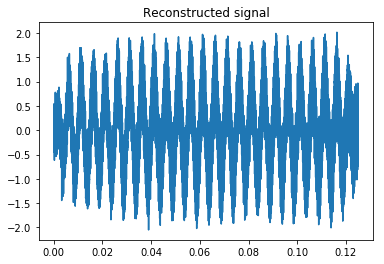

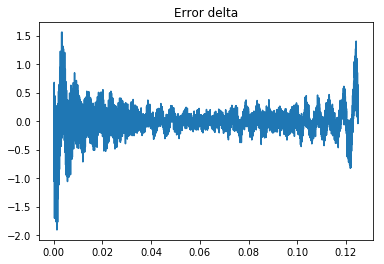

In [10]:
figure()
plot(t,Xhat)
title('Reconstructed signal')
figure()
plot(t,Xhat-X)
title('Error delta')

Text(0.5, 1.0, 'Original and reconstructed signal plotted together (green is orig)')

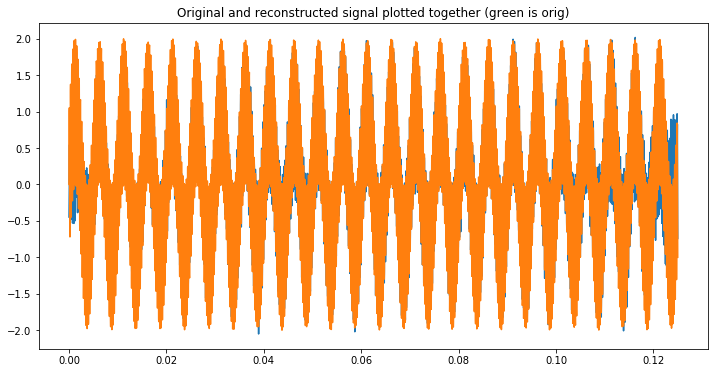

In [11]:
figure(figsize=[12,6])
plot(t,Xhat)
plot(t,X)
title("Original and reconstructed signal plotted together (green is orig)")

In [12]:
print("Signal is reconstructed using only %{0} of the data!".format(100.*M/N_samps))

Signal is reconstructed using only %5.0 of the data!


Text(0, 0.5, 'Power (dB)')

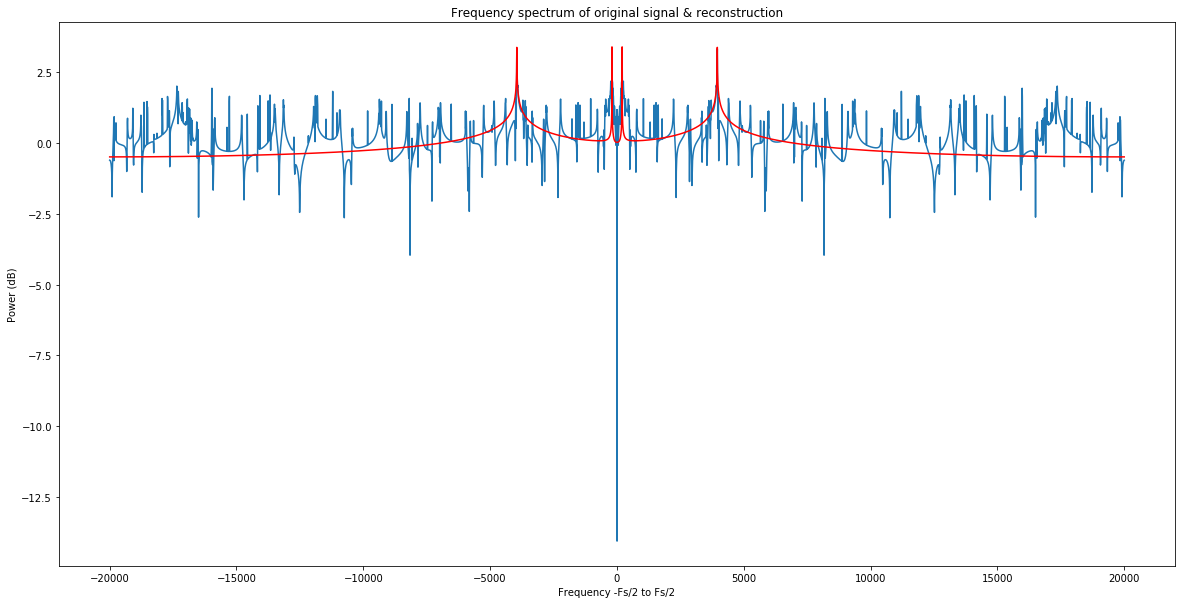

In [15]:
f = np.linspace(-Fs/2,Fs/2,N_samps)
figure(figsize=[20,10])
plot(f,np.log10(np.fft.fftshift(np.abs(np.fft.fft(Xhat)))))

title("Frequency spectrum of original signal & reconstruction")

plot(f,np.log10(np.fft.fftshift(np.abs(np.fft.fft(X)))),'r')

plt.pyplot.xlabel('Frequency -Fs/2 to Fs/2')
plt.pyplot.ylabel('Power (dB)')